In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../data/train.csv')
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_472\3351140508.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [2]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [3]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [4]:
#Drop the column which is out of model scope
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df = df.drop(d_col , axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
#Drop it
drop_na = drop_df.dropna().copy()

In [7]:
#Drop the incorrect data
df = df[df['Occupation'].str.contains('_______') == False]
df = df[df['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [8]:
#Drop the incorrect data
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [9]:
# Revise the incorrect data whole table
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_472\3158122510.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].astype(str).str.replace(c,'')


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good


In [10]:
#Transform the information to the value
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

In [11]:
#Transform the information to the value as level
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,1,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,6,484.5912142650067,Good


In [12]:
#Transform the object data the be float data type 
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [13]:
# Transform the target data to numerical
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '3', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '1', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No', '2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


In [14]:
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [15]:
drop_na.count()

Age                       71843
Occupation                71843
Annual_Income             71843
Delay_from_due_date       71843
Num_of_Delayed_Payment    71843
Outstanding_Debt          71843
Credit_History_Age        71843
Payment_of_Min_Amount     71843
Total_EMI_per_month       71843
Payment_Behaviour         71843
Monthly_Balance           71843
Credit_Score              71843
dtype: int64

In [16]:
drop_na = drop_na.drop_duplicates()
drop_na.count()

Age                       71843
Occupation                71843
Annual_Income             71843
Delay_from_due_date       71843
Num_of_Delayed_Payment    71843
Outstanding_Debt          71843
Credit_History_Age        71843
Payment_of_Min_Amount     71843
Total_EMI_per_month       71843
Payment_Behaviour         71843
Monthly_Balance           71843
Credit_Score              71843
dtype: int64

In [17]:
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3


In [18]:
df_cleaned = drop_na

In [19]:
df_cleaned.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,71843.000000,7.184300e+04,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,7.184300e+04,71843.000000
mean,110.772212,1.751183e+05,21.041201,31.190443,1422.212792,18.389782,1.238047,1400.981096,3.272720,-3.247823e+22,1.887449
std,685.332013,1.430392e+06,14.867880,228.220729,1151.139555,8.289498,0.648968,8279.352134,1.845655,3.290163e+24,0.675195
min,-500.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.930790e+04,10.000000,9.000000,565.995000,12.100000,1.000000,30.116962,1.000000,2.698337e+02,1.000000
50%,33.000000,3.696676e+04,18.000000,14.000000,1163.400000,18.200000,1.000000,68.348799,3.000000,3.364063e+02,2.000000
75%,42.000000,7.230590e+04,28.000000,18.000000,1941.540000,25.100000,2.000000,156.468001,5.000000,4.708997e+02,2.000000
max,8698.000000,2.419806e+07,67.000000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


In [20]:
# Drop outlier by IQR calculation
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


In [21]:
### Balancing - Occupation
occupation_count = df_cleaned['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           4912
Mechanic         4761
Teacher          4760
Engineer         4752
Architect        4735
Scientist        4722
Entrepreneur     4680
Developer        4659
Media_Manager    4651
Accountant       4647
Journalist       4614
Doctor           4580
Manager          4480
Musician         4473
Writer           4414
Name: Occupation, dtype: int64

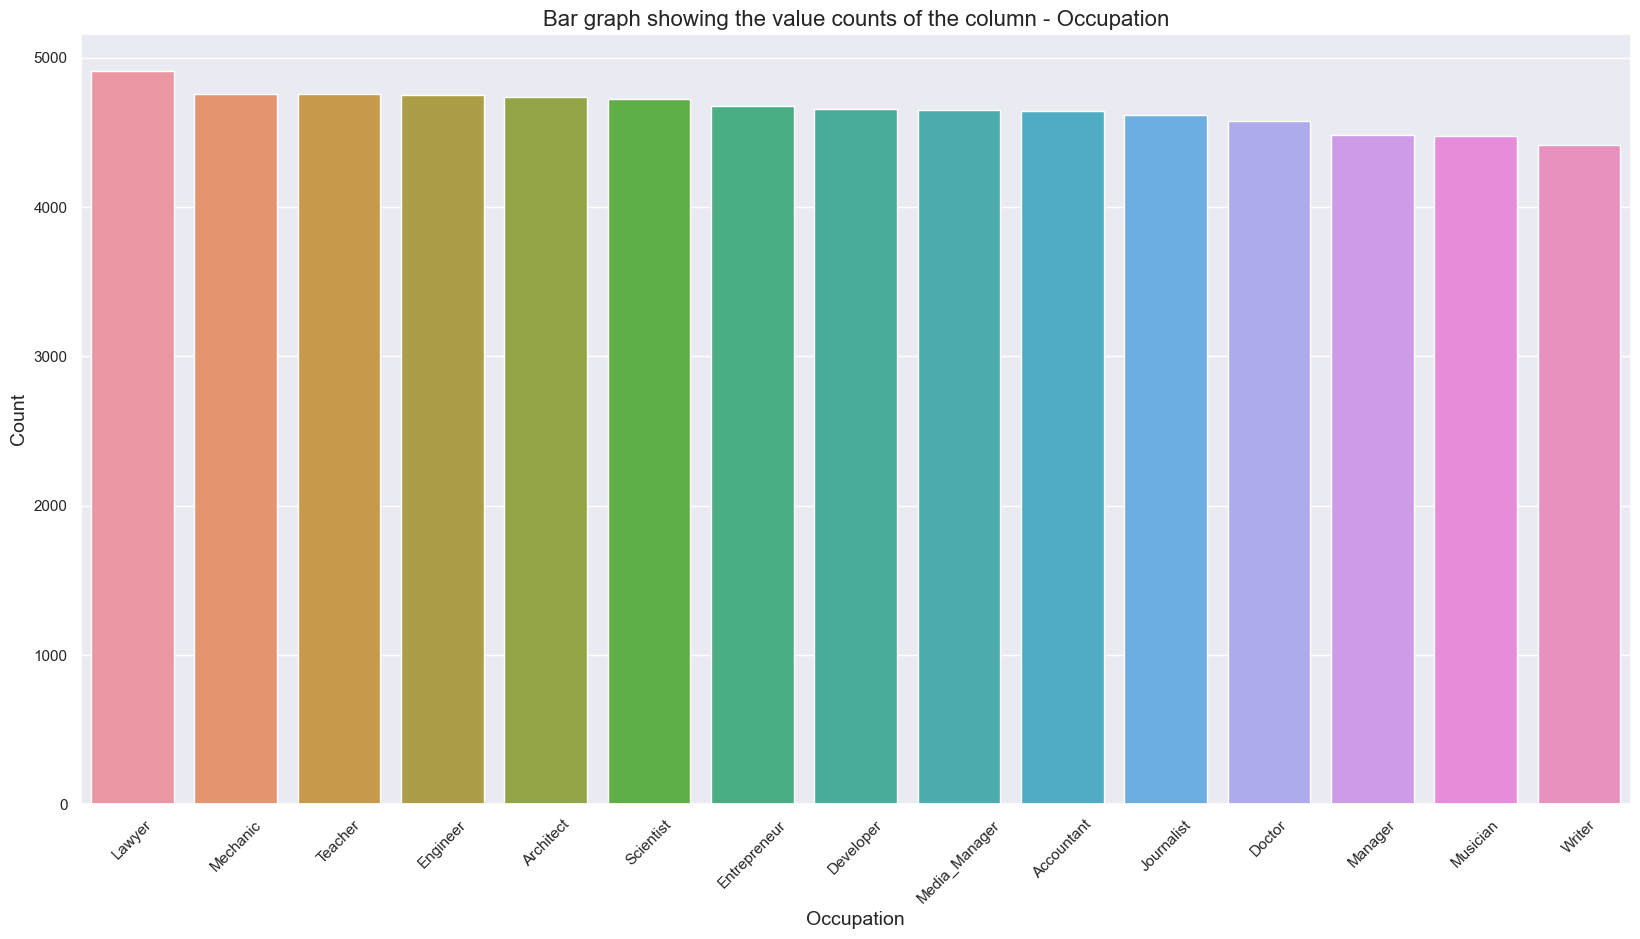

In [22]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

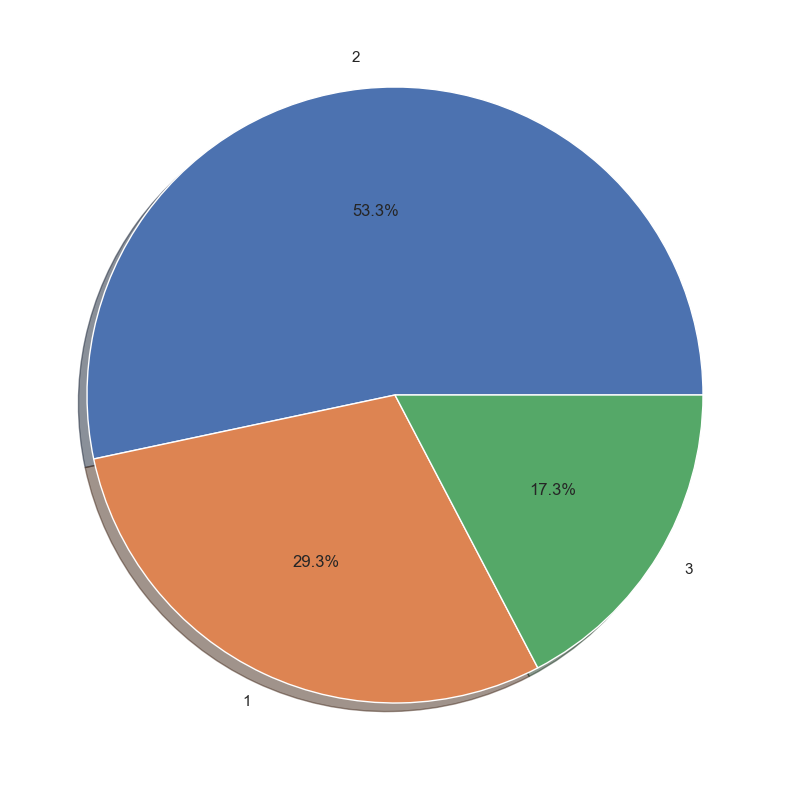

In [23]:
# Explore data balance
label = df_cleaned.Credit_Score.value_counts().index
label_count = df_cleaned.Credit_Score.value_counts().values
plt.pie(data=df_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>],
       [<AxesSubplot:title={'center':'Payment_of_Min_Amount'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Payment_Behaviour'}>],
       [<AxesSubplot:title={'center':'Monthly_Balance'}>,
        <AxesSubplot:title={'center':'Credit_Score'}>, <AxesSubplot:>]],
      dtype=object)

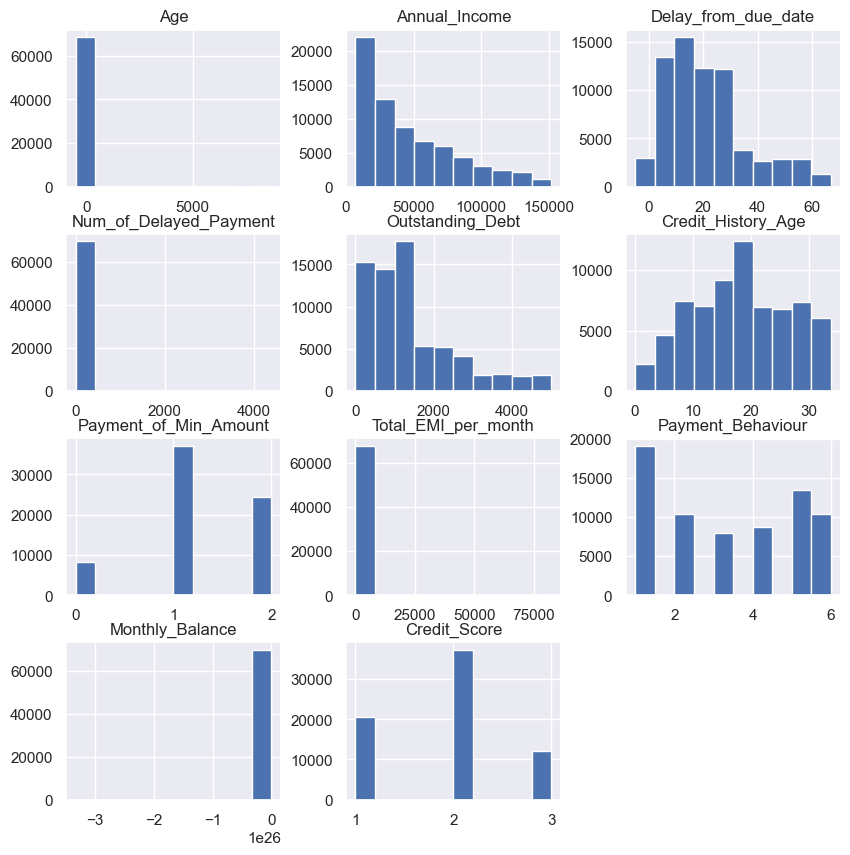

In [24]:
df_cleaned.hist(figsize=(10, 10))

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.056860,Scientist,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,3
2,0.000000,Scientist,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,3
3,0.056860,Scientist,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,3
6,0.056860,Scientist,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,3
9,0.057404,Teacher,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,3


In [26]:
#encoding
df_cleaned.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [27]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
X = df_cleaned.drop('Credit_Score',axis = 1)
y = df_cleaned['Credit_Score']

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=15)
ordered_feature=ordered_rank_features.fit(X,y)

In [31]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [32]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [33]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Age,0.179896
1,Annual_Income,544.652774
2,Delay_from_due_date,1511.792739
3,Num_of_Delayed_Payment,1.956702
4,Outstanding_Debt,1984.018739
5,Credit_History_Age,1177.312509
6,Payment_of_Min_Amount,2209.899855
7,Total_EMI_per_month,1.492433
8,Payment_Behaviour,1013.418098
9,Monthly_Balance,0.000101


In [34]:
features_rank.nlargest(10,'Score')

,Features,Score
6,Payment_of_Min_Amount,2209.899855
4,Outstanding_Debt,1984.018739
2,Delay_from_due_date,1511.792739
5,Credit_History_Age,1177.312509
8,Payment_Behaviour,1013.418098
1,Annual_Income,544.652774
24,Occupation_Writer,52.244516
23,Occupation_Teacher,10.512065
19,Occupation_Mechanic,8.536591
16,Occupation_Journalist,7.794315


In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [36]:
print(model.feature_importances_)

[8.66326331e-02 9.77904687e-02 1.32174476e-01 9.68488545e-02
 1.61176769e-01 1.59057481e-01 5.71194275e-02 8.01990635e-02
 4.83362233e-02 6.63598893e-05 5.16058580e-03 5.61236616e-03
 6.08547711e-03 4.91124918e-03 5.62901616e-03 5.63970721e-03
 5.29238506e-03 5.42305606e-03 5.82626414e-03 5.17513098e-03
 5.42326838e-03 5.89744443e-03 5.69823231e-03 4.81911750e-03
 4.00494284e-03]


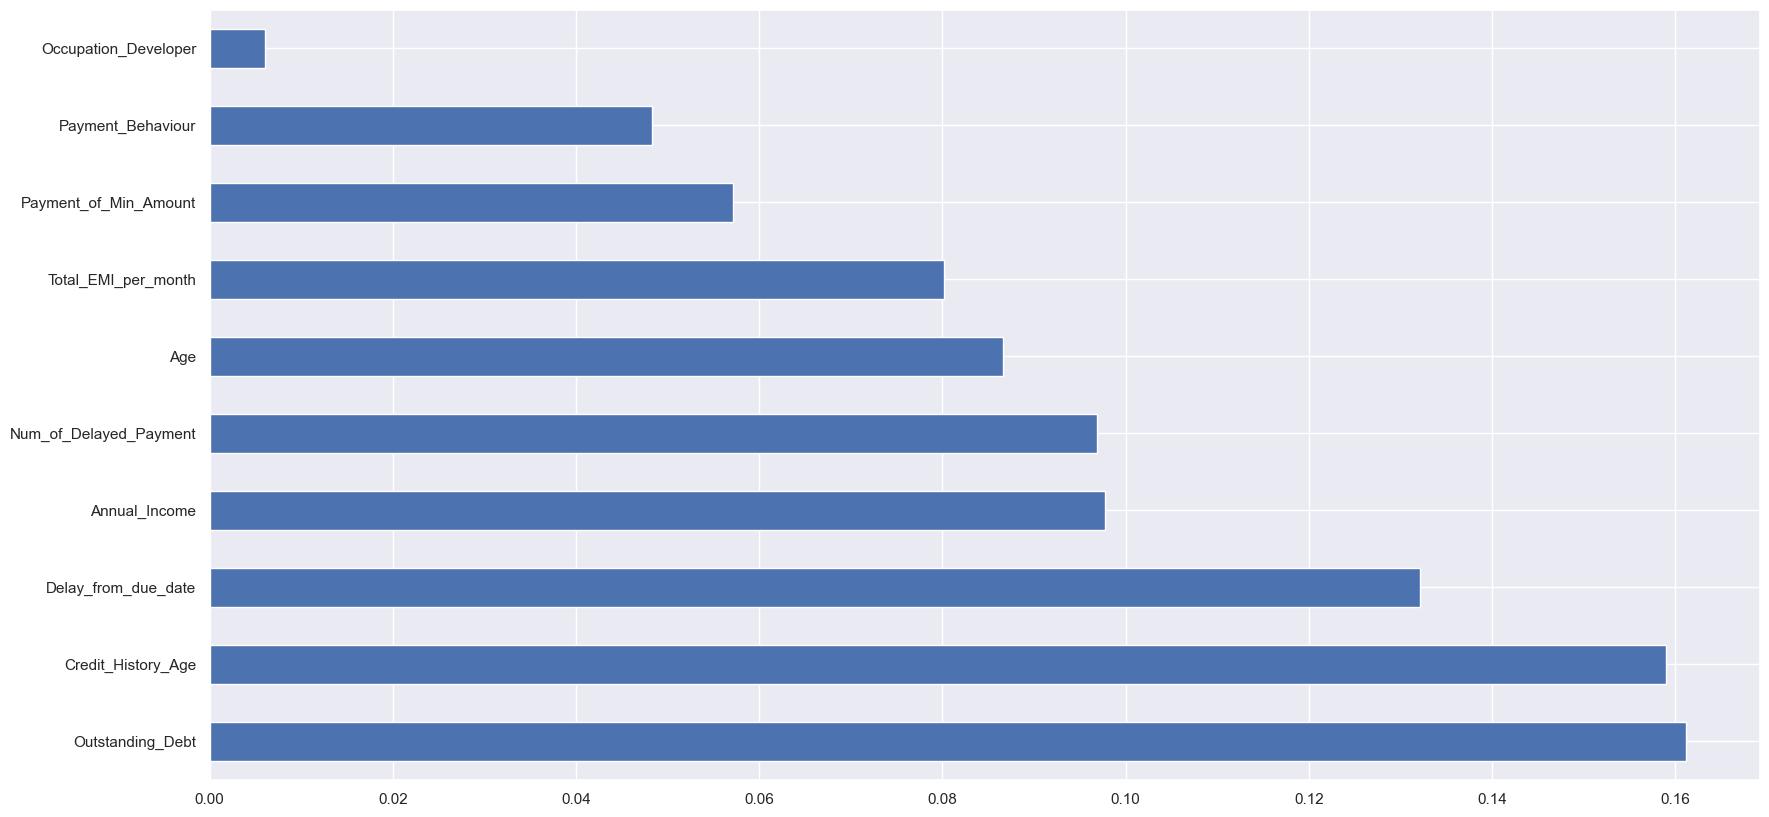

Outstanding_Debt          0.161177
Credit_History_Age        0.159057
Delay_from_due_date       0.132174
Annual_Income             0.097790
Num_of_Delayed_Payment    0.096849
Age                       0.086633
dtype: float64


In [37]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
lst=ranked_features.nlargest(10).plot(kind='barh')
plt.show()
lst=ranked_features.nlargest(6)
print(lst)

<AxesSubplot:>

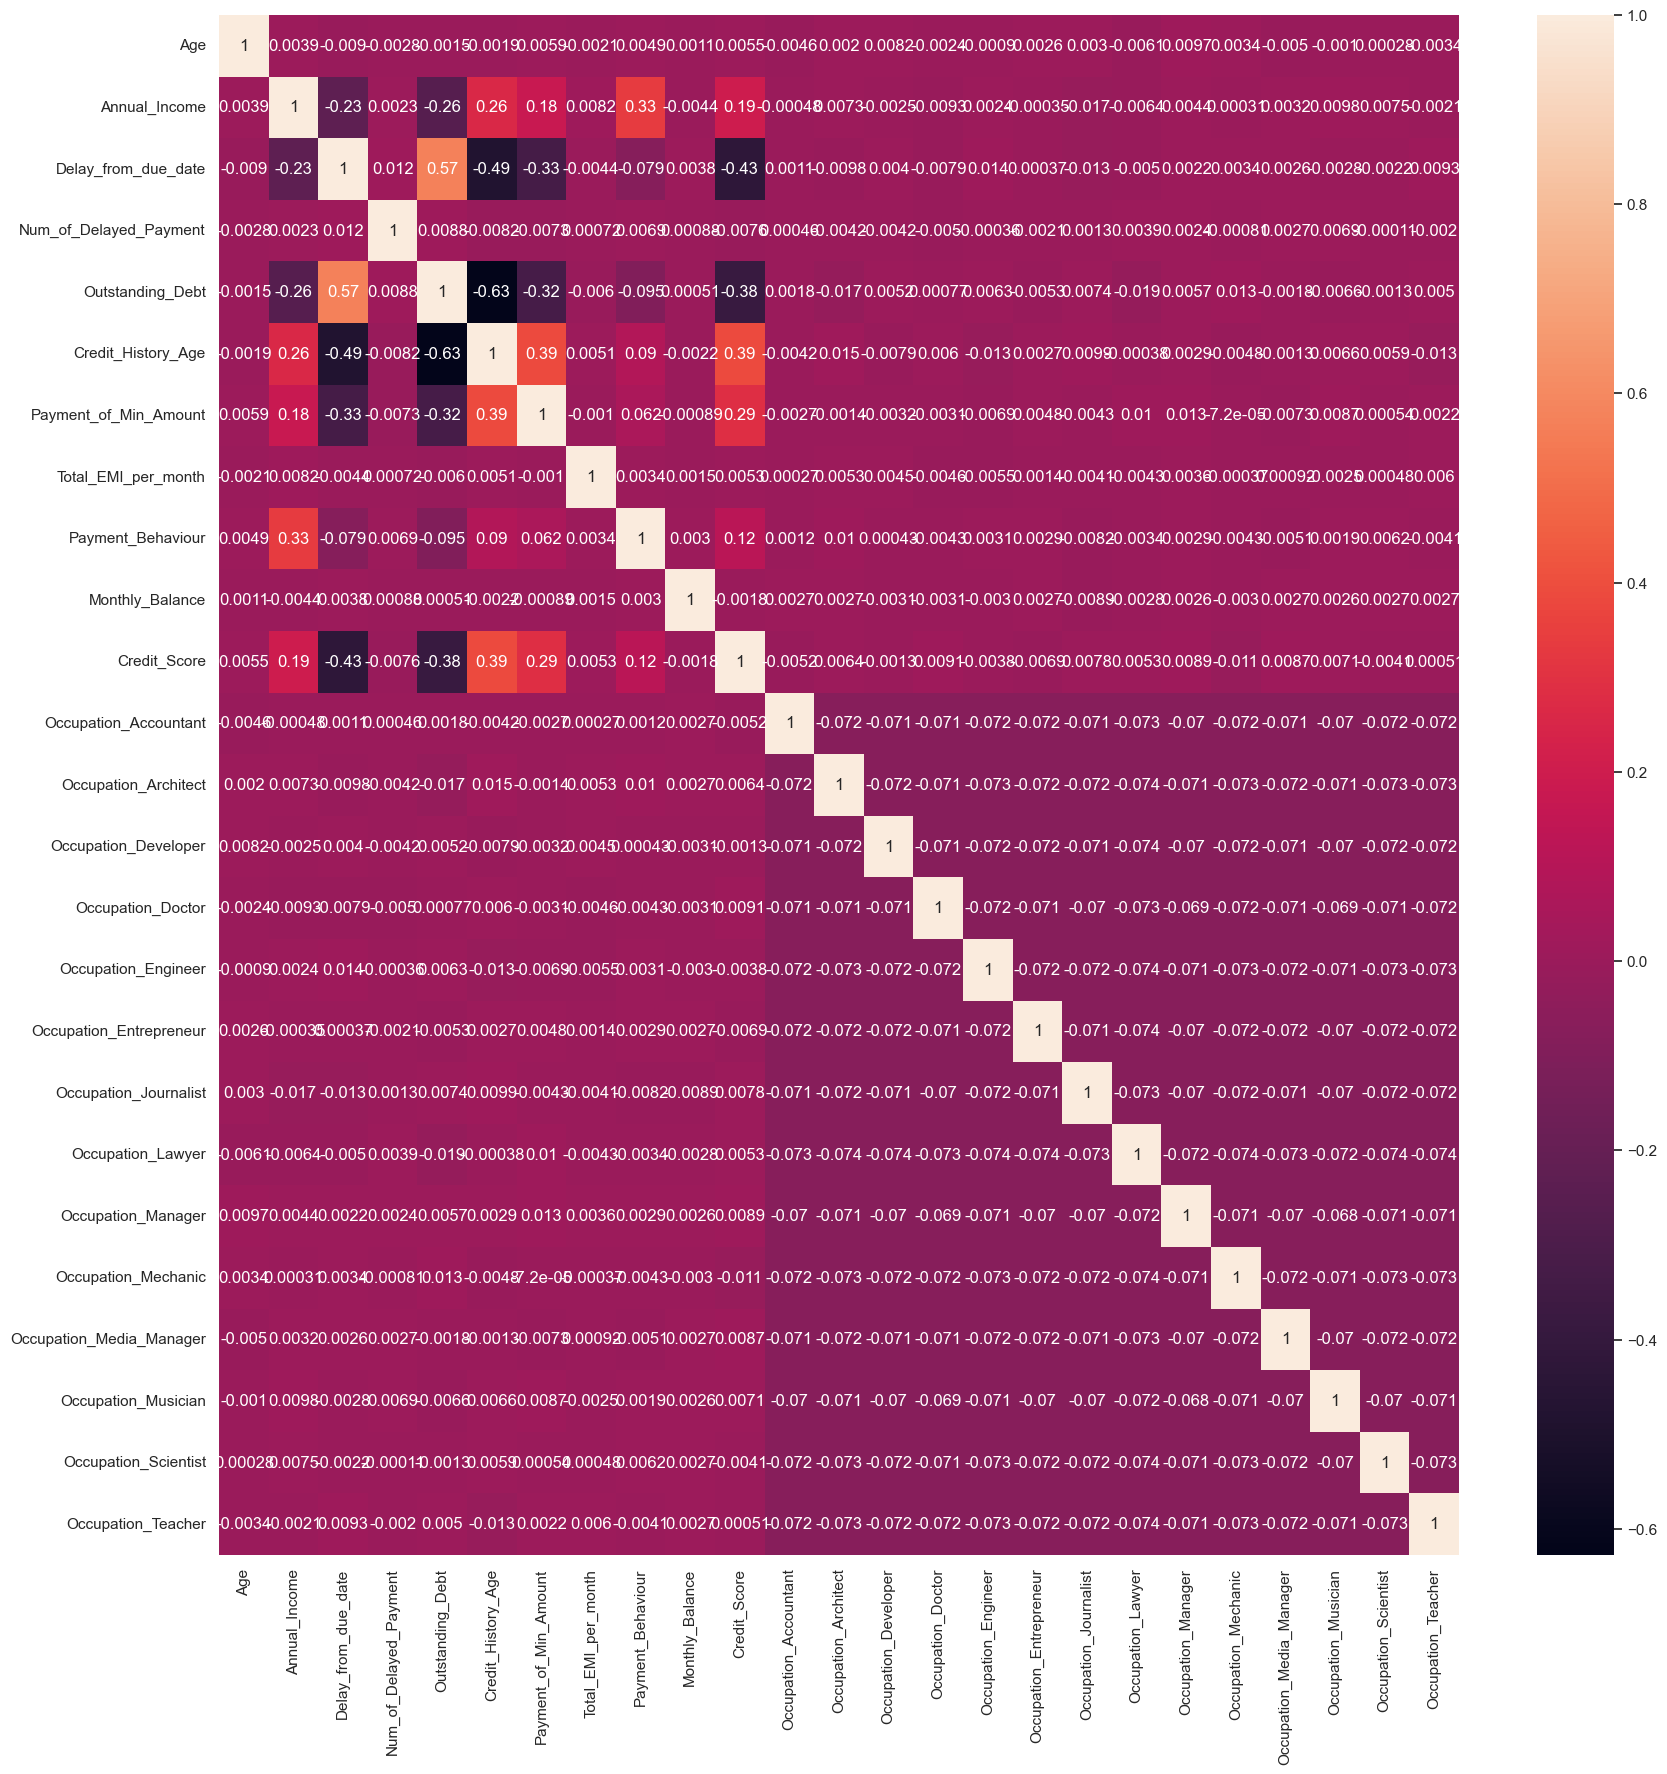

In [38]:
import seaborn as sns
corr=df_cleaned.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df_cleaned[top_features].corr(),annot=True)

In [39]:
threshold=0.5

In [40]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
col_corr = correlation(X,threshold)

In [42]:
#df_cleaned = df_cleaned[['Credit_History_Age', 'Outstanding_Debt','Payment_Behaviour','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment','Credit_Score']]
df_cleaned = df_cleaned[['Credit_History_Age', 'Outstanding_Debt','Credit_Score']]
df_cleaned.head()

,Credit_History_Age,Outstanding_Debt,Credit_Score
0,0.652819,0.162020,3
2,0.658754,0.162020,3
3,0.661721,0.162020,3
6,0.670623,0.162020,3
9,0.792285,0.121012,3


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df_cleaned.drop('Credit_Score',axis=1))
scaled_features

array([[ 0.46028366, -0.54071491],
       [ 0.48439632, -0.54071491],
       [ 0.49645265, -0.54071491],
       ...,
       [ 1.60563513, -0.80690871],
       [ 1.61769146, -0.80690871],
       [ 1.6297478 , -0.80690871]])

In [44]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features, df_cleaned['Credit_Score'],test_size=0.20,random_state=None)

In [45]:
!pip install lazypredict

     ---------------------------------------- 1.0/1.0 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 89.1/89.1 MB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [07:22<00:00, 15.25s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
DecisionTreeClassifier             0.75               0.73    None      0.75   
BaggingClassifier                  0.75               0.72    None      0.75   
ExtraTreeClassifier                0.60               0.57    None      0.60   
NearestCentroid                    0.47               0.56    None      0.46   
Perceptron                         0.38               0.56    None      0.26   
ExtraTreesClassifier               0.60               0.55    None      0.60   
RandomForestClassifier             0.59               0.53    None      0.59   
KNeighborsClassifier               0.60               0.52    None      0.59   
LGBMClassifier                     0.62               0.48    None      0.56   
GaussianNB                         0.52               0.47    None      0.52   
BernoulliNB                        0.59 

In [47]:
score_dict = []

In [48]:
#k-fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,random_state= None)
k = kfold.get_n_splits(scaled_features)

In [49]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors= k).fit(X_train,y_train)
prediction=knn_classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score
print(f'confusion matrix : {confusion_matrix(y_test,prediction)}')
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(classification_report(y_test,prediction))
score_dict.append(accuracy_score(y_test,prediction))

confusion matrix : [[2561 1410  137]
 [1461 5311  659]
 [ 224 1632  573]]
Accuracy Score : 0.6045962199312714
              precision    recall  f1-score   support

           1       0.60      0.62      0.61      4108
           2       0.64      0.71      0.67      7431
           3       0.42      0.24      0.30      2429

    accuracy                           0.60     13968
   macro avg       0.55      0.52      0.53     13968
weighted avg       0.59      0.60      0.59     13968



In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
count_true = 0
lst_predict = []
lst_test= []
for k,y_predict in enumerate(y_pred):
    lst_predict.append(y_predict)
for k,y_predict1 in enumerate(y_test):
    lst_test.append(y_predict1)
for j, y_predict  in enumerate(lst_predict):
    if (abs(lst_predict[j]- lst_test[j]) < 1):
        count_true += 1
score_dict.append(count_true/len(y_test))

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=2)
dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy=",accuracy)
score_dict.append(accuracy_score(y_test,y_pred))

accuracy= 0.7429839633447881


In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("accuracy=",accuracy)
score_dict.append(accuracy_score(y_test,y_pred))

confusion matrics= [[1938 1868  302]
 [1470 4552 1409]
 [  62 1593  774]]
accuracy= 0.5200458190148912


In [54]:
### Manual Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
score_dict.append(accuracy_score(y_test,predictions))

[[2613 1445   50]
 [1235 5993  203]
 [  55 2038  336]]
0.6401775486827033
              precision    recall  f1-score   support

           1       0.67      0.64      0.65      4108
           2       0.63      0.81      0.71      7431
           3       0.57      0.14      0.22      2429

    accuracy                           0.64     13968
   macro avg       0.62      0.53      0.53     13968
weighted avg       0.63      0.64      0.61     13968



In [55]:
score_dict

[0.6045962199312714,
 0.8995561282932417,
 0.7429839633447881,
 0.5200458190148912,
 0.6401775486827033]

In [56]:
score_dict = sorted(score_dict)
score_dict

[0.5200458190148912,
 0.6045962199312714,
 0.6401775486827033,
 0.7429839633447881,
 0.8995561282932417]

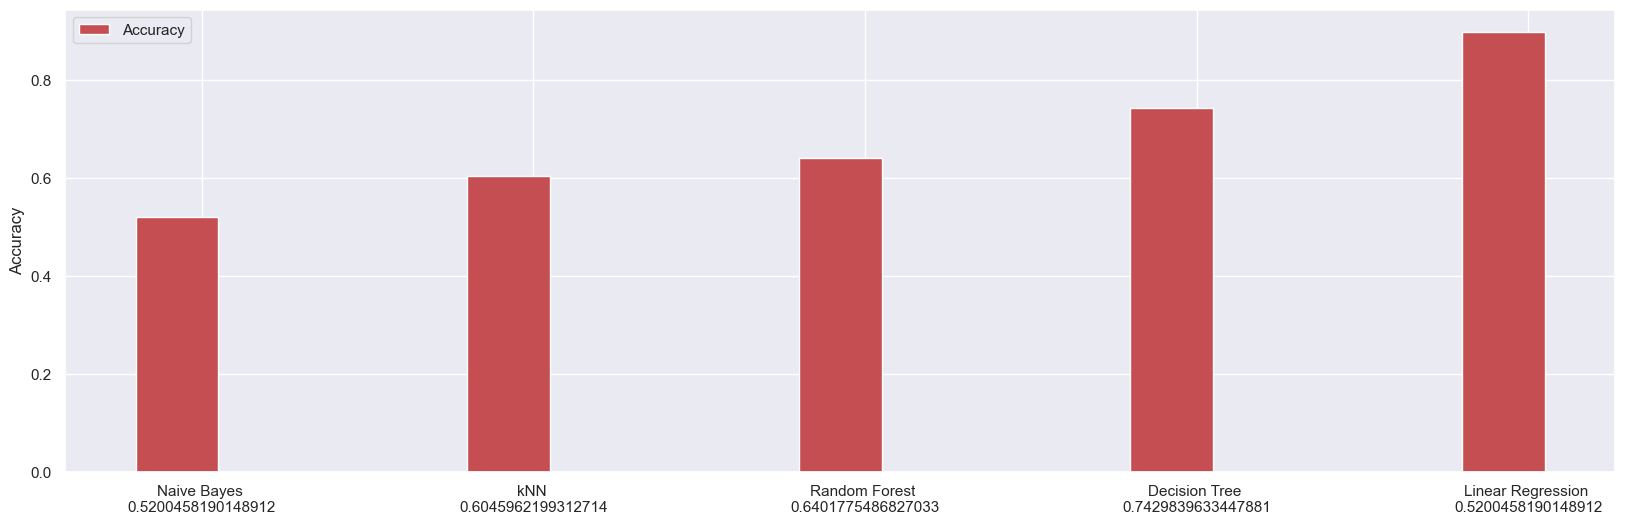

In [78]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(score_dict)) - 0.2, score_dict, color='r', width=0.25, align='edge')
ax.legend(["Accuracy"])
ax.set_xticklabels(["Naive Bayes \n%s" %(score_dict[0]), "kNN \n%s" %(score_dict[1]), "Random Forest \n%s" %(score_dict[2]), 
                    "Decision Tree \n%s" %(score_dict[3]), "Linear Regression \n%s" %(score_dict[0])])
ax.set_xticks(np.arange(len(score_dict)))
plt.ylabel("Accuracy")
plt.show()